In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
sns.set(font_scale=1.3, style="ticks")

In [2]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

In [3]:
def cleanup(df):
    """
    Cleanup of df data.
    Dataset specific.
    """
    def _replace(df, column, str1, str2):
        if column in df:
            df[column] = df[column].str.replace(str1, str2)
            
    def _to_num(df, column):
        if column in df:
            df[column] = pd.to_numeric(df[column])
        
    _replace(df, "req_size", "ab -c 1 -t 60 -n 9999 -e /tngbench_share/ab_logs.csv -s 60 -k -i http://20.0.0.254:80/", "-")
    #_replace(df, "req_size", "ab -c 1 -t 60 -n 9999 -e /tngbench_share/ab_logs.csv -s 60 -k -i http://20.0.0.254:80/", "-")

In [4]:
df01 = pd.read_csv("/home/idli/results/analysis/result_ec_metrics_full.csv")
#df02 = pd.read_csv("/home/idli/results/analysis/result_ec_metrics_multi.csv")

In [5]:
map_01 = {
    "param__func__mp.input__cmd_start": "req_size",
    "param__func__de.upb.lb-traefik.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.lb-traefik.0.1__mem_max": "memory",
    "metric__mp.input.vdu01.0__ab_completed_requests": "req_compl",
    #"metric__mp.input.vdu01.0__ab_concurrent_lvl": "req_concurrent",
    #"metric__mp.input.vdu01.0__ab_failed_requests": "req_failed",
    #"metric__mp.input.vdu01.0__ab_html_transfer_byte": "req_html_bytes",
    "metric__mp.input.vdu01.0__ab_mean_time_per_request": "req_time_mean",
    "metric__mp.input.vdu01.0__ab_request_per_second": "req_per_sec",
    #"metric__mp.input.vdu01.0__ab_time_used_s": "req_time_used",
    "metric__mp.input.vdu01.0__ab_total_transfer_byte": "transf_bytes",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "req_transf_rate",
    "metric__vnf0.vdu01.0__stat__input__rx_bytes": "if_rx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__rx_dropped": "if_in_rx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__rx_errors": "if_in_rx_errors",
    #"metric__vnf0.vdu01.0__stat__input__rx_packets": "if_in_rx_packets",
    "metric__vnf0.vdu01.0__stat__input__tx_bytes": "if_tx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__tx_dropped": "if_in_tx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__tx_errors": "if_in_tx_errors",
    #"metric__vnf0.vdu01.0__stat__input__tx_packets": "if_in_tx_packets",
    "metric__mp.output1.vdu01.0__stat__data__rx_bytes": "server 1",
    "metric__mp.output2.vdu01.0__stat__data__rx_bytes": "server 2"
}

df01["vnf"] = "traefik with 2 servers"
#df02["vnf"] = "traefik with 5 servers"

dfs_raw = [df01]
map_list = [map_01]
dfs = list()  # clean data frames

for (df, m) in zip(dfs_raw, map_list):
    tmp = select_and_rename(df.copy(), m)
    cleanup(tmp)
    dfs.append(tmp)

dfs[0].head()


/home/idli/project/project/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,req_size,cpu_bw,memory,req_compl,req_time_mean,req_per_sec,transf_bytes,req_transf_rate,if_rx_bytes,if_tx_bytes,server 1,server 2
0,-,0.3,256,9999,2.348,425.84,2749725,114.36,1691007.0,3413009.0,2609746.0,525090.0
1,-,0.3,256,9999,2.371,421.83,2749725,113.28,1691007.0,3413075.0,2610298.0,525288.0
2,-,0.3,256,9999,2.421,412.97,2749725,110.90,1691007.0,3413075.0,2610010.0,525090.0
3,-,0.3,256,9999,2.387,418.91,2749725,112.50,1691007.0,3413075.0,2610076.0,525486.0
4,-,0.3,256,9999,2.428,411.86,2749725,110.61,1691007.0,3413075.0,2610076.0,525222.0


In [14]:
dfs[0].describe()

,cpu_bw,memory,req_compl,req_time_mean,req_per_sec,transf_bytes,req_transf_rate,if_rx_bytes,if_tx_bytes,server 1,server 2
count,1920.000000,1920.000000,1920.0,1920.000000,1920.000000,1920.0,1920.000000,1.920000e+03,1.920000e+03,1.920000e+03,1920.000000
mean,0.650000,597.333333,9999.0,1.303144,865.300302,2749725.0,232.380422,1.691009e+06,3.411161e+06,2.608199e+06,523503.259375
std,0.229188,319.371277,0.0,0.506196,262.387814,0.0,70.465596,2.281720e+01,1.102747e+03,1.090012e+03,1082.708090
min,0.300000,256.000000,9999.0,0.800000,411.660000,2749725.0,110.550000,1.690937e+06,3.409907e+06,2.606710e+06,521988.000000
25%,0.475000,256.000000,9999.0,0.888000,667.245000,2749725.0,179.187500,1.691007e+06,3.409907e+06,2.607040e+06,522318.000000
50%,0.650000,512.000000,9999.0,1.067500,937.545000,2749725.0,251.780000,1.691007e+06,3.411227e+06,2.608294e+06,523638.000000
75%,0.825000,1024.000000,9999.0,1.505500,1126.592500,2749725.0,302.550000,1.691007e+06,3.411920e+06,2.609020e+06,524298.000000
max,1.000000,1024.000000,9999.0,2.429000,1249.910000,2749725.0,335.670000,1.691345e+06,3.413207e+06,2.610694e+06,525750.000000


In [10]:
def plot_correlogram(corr, filename=None):
    # generate mask to hide triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # define color pallete
    cmap = sns.color_palette("coolwarm", 15)

    # plot heatmap
    #corrmat = data.corr() 
    f, ax = plt.subplots(figsize =(9, 8)) 
    sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

    #f, ax = plt.subplots(figsize=(6, 6))
    #sns.heatmap(ax=ax, data=corr, mask=mask, cmap=cmap , center=0, square=True, linewidth=.5, cbar_kws={"shrink": .7}, fmt=".2f", annot=True, annot_kws={"size": 10})
    plt.tight_layout()
    if filename:
        plt.savefig("/home/idli/results/analysis/plots/{}.pdf".format(filename), dpi=300)
        plt.savefig("/home/idli/results/analysis/plots/{}.png".format(filename), dpi=300)
        

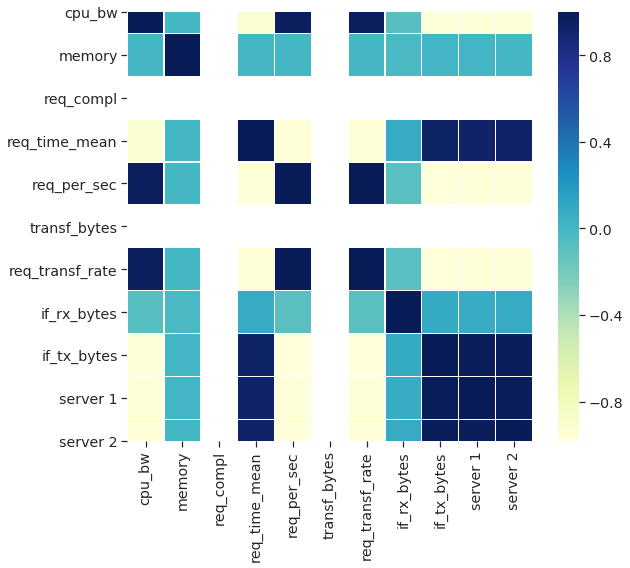

In [11]:
# compute correlation
corrs = [df.corr() for df in dfs]
#print(corr)
#sns.pairplot(df01)

filenames = [
    "corr_matrix_traefik01",
    #"corr_matrix_traefik02",
]

for i, c in enumerate(corrs):
    plot_correlogram(c, filename=filenames[i])